In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##  look at the freely available data on births in the United States, provided by the Centers for Disease Control (CDC)

In [2]:
data = pd.read_csv('births.csv')
data

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


### Immediately realize the Nan values

In [3]:
# check the existance of nan values in each column
data.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

### The column "day" has nan values

In [4]:
data['day'].fillna(0, inplace=True)
print(" Checking the nan values for all cols again\n", data.isna().sum())
print("Check the new data format after filling by zero")
data

 Checking the nan values for all cols again
 year      0
month     0
day       0
gender    0
births    0
dtype: int64
Check the new data format after filling by zero


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,0.0,M,183219
15543,2008,11,0.0,F,158939
15544,2008,11,0.0,M,165468
15545,2008,12,0.0,F,173215


In [5]:
data['day']=data['day'].astype(int)
data

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
15542,2008,10,0,M,183219
15543,2008,11,0,F,158939
15544,2008,11,0,M,165468
15545,2008,12,0,F,173215


In [6]:
# Check the birth of male and female decade by decade
data['decade'] = (data['year']//10)*10
birth_count = data.groupby(['decade', 'gender'])['births'].sum()
birth_count=birth_count.reset_index()

In [7]:
birth_count

,decade,gender,births
0,1960,F,1753634
1,1960,M,1846572
2,1970,F,16263075
3,1970,M,17121550
4,1980,F,18310351
5,1980,M,19243452
6,1990,F,19479454
7,1990,M,20420553
8,2000,F,18229309
9,2000,M,19106428


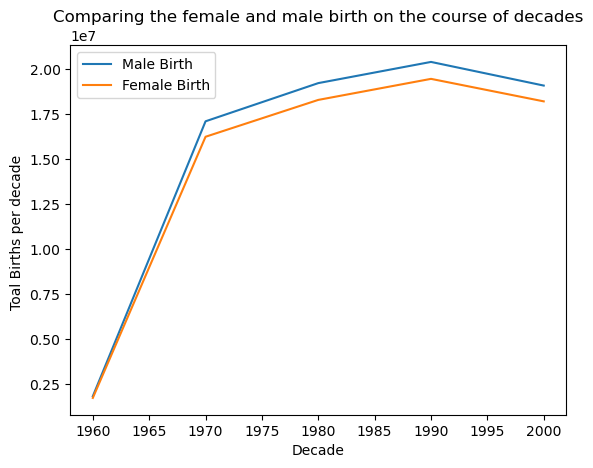

In [8]:
# male_rows = birth_count[birth_count['gender']=='M']['decade','0]
# female_rows = birth_count[birth_count['gender']=='F']
male_decade = np.array(birth_count[birth_count['gender']=='M']['decade'])
male_count = np.array(birth_count[birth_count['gender']=='M']['births'])
female_decade = np.array(birth_count[birth_count['gender']=='F']['decade'])
female_count = np.array(birth_count[birth_count['gender']=='F']['births'])
plt.plot(male_decade, male_count, label='Male Birth')
plt.plot(female_decade, female_count, label='Female Birth')
plt.title('Comparing the female and male birth on the course of decades')
plt.xlabel('Decade')
plt.ylabel('Toal Births per decade ')
plt.legend()

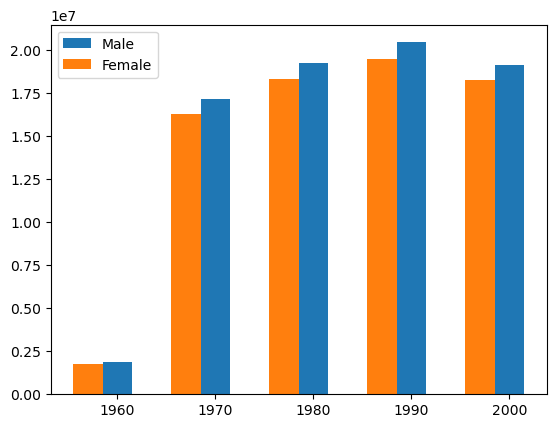

In [9]:
width=0.5
plt.bar(male_decade, male_count , 3, label='Male')
plt.bar(female_decade-3, female_count , 3, label='Female')
plt.legend()


#### We can see that on the course of decades, the male birth is higher than the female birth. Also in 1990 we have the maximum birth in both genders

https://thecleverprogrammer.com/2020/05/08/birth-rate-analysis/

#### There are a few interesting features we can pull out of this dataset using the Pandas tools. We must start by cleaning the data a bit, removing outliers caused by mistyped dates or missing values. One easy way to remove these all at once is to cut outliers, we’ll do this via a robust sigma-clipping operation:

In [14]:
quartiles = np.percentile(data['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
print(quartiles, mu, sig)

[4358.  4814.  5289.5] 4814.0 689.31


#### This final line is a robust estimate of the sample mean, where the 0.74 comes from the interquartile range of a Gaussian distribution. With this we can use the query() method to filter out rows with births outside these values:

In [17]:
data = data.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
data['day'] = data['day'].astype(int)
data.index = pd.to_datetime(10000 * data.year + 100 * data.month + data.day, format='%Y%m%d')# 2022y, 3m, 15d -> 20220000 => 20220315: 2022-03-15

data['dayofweek'] = data.index.dayofweek

#### Using this we can plot births by weekday for several decades:

In [29]:
data.columns

Index(['year', 'month', 'day', 'gender', 'births', 'decade', 'dayofweek'], dtype='object')

/tmp/ipykernel_1092192/1922802411.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


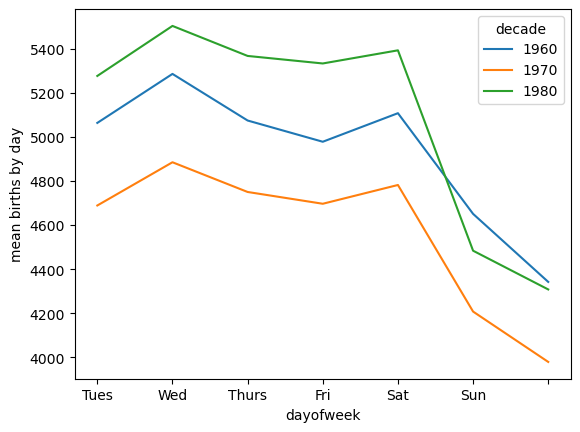

In [28]:
data.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

#### Apparently births are slightly less common on weekends than on weekdays!